In [52]:
from libraries import *
from parameters import *
from sklearn.cross_decomposition import PLSCanonical, PLSRegression, CCA
from sklearn.model_selection import cross_val_score
from numpy import asarray
from numpy import savetxt
from adjustText import adjust_text
import scvi
from sklearn.cluster import SpectralBiclustering
from sklearn.cluster import SpectralClustering
from sklearn.cluster import KMeans

%matplotlib inline

In [53]:
coefsAll = pd.read_csv("/home/beraslan/jovian-work/analysisSingle/MixedEffectLMOutputs/ME_SignificantBetaCoefs.csv", header=0, index_col=0)
coefsAll.index = [cond.split('_')[1] for cond in coefsAll.index]

In [54]:
n_GuideClusters = 7
n_GeneClusters = 9

In [55]:
kmeans = KMeans(n_clusters=n_GuideClusters, random_state=0).fit(coefsAll)

In [56]:
pd.DataFrame(kmeans.labels_).value_counts()

1    168
3    117
6     19
5     17
0      3
2      3
4      2
dtype: int64

In [57]:
guideModules = pd.DataFrame({"GuideName": np.array(coefsAll.index), "GuideGroup":kmeans.labels_})
guideModules = guideModules.sort_values(["GuideGroup", "GuideName"], ascending = (True, True))

In [58]:
guideCov = pd.DataFrame(np.corrcoef(coefsAll), index=coefsAll.index, columns=coefsAll.index)
guideCov = guideCov.loc[guideModules.GuideName,guideModules.GuideName]

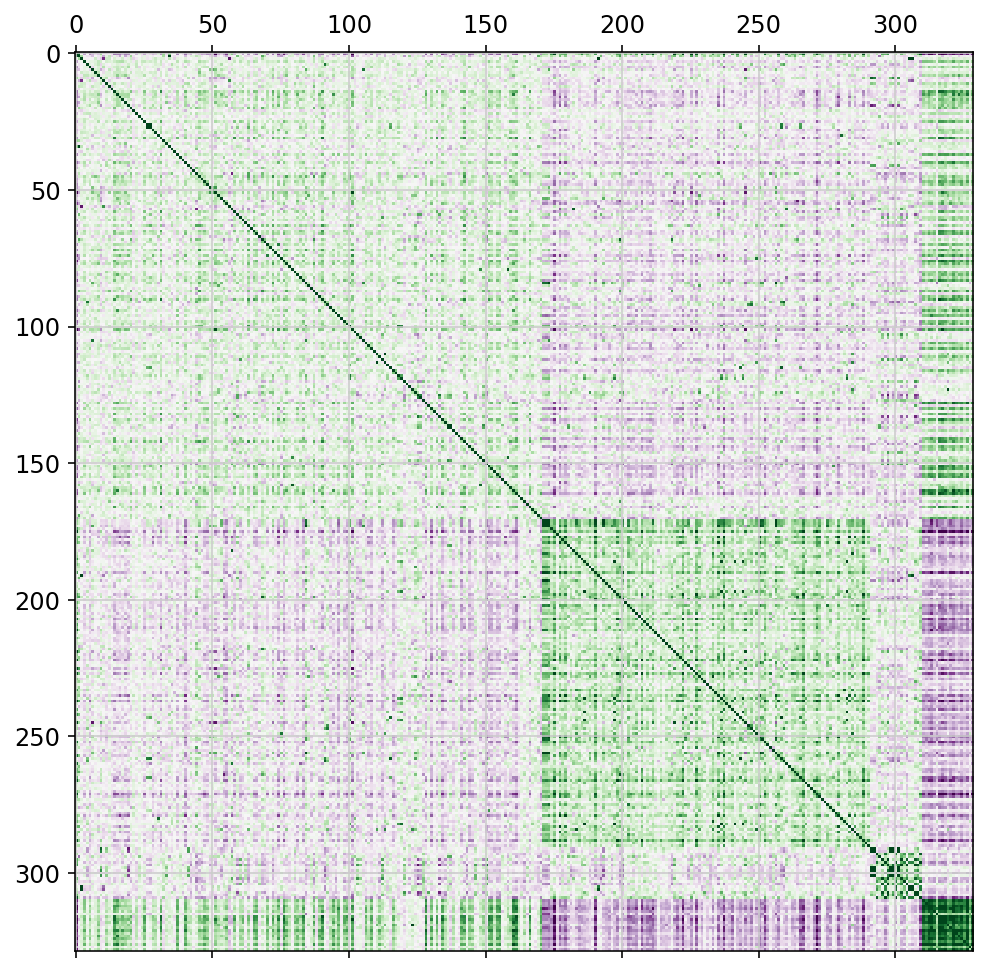

In [59]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
cax = ax.matshow(guideCov, cmap=plt.cm.PRGn, vmin=-0.5, vmax=0.5)
#fig.colorbar(cax, orientation="horizontal")

In [60]:
guideModules.to_csv("/home/beraslan/jovian-work/analysisSingle/ME_GuideModules_kmeans_"+str(n_GuideClusters)+"_Modules.csv")



In [61]:
kmeansGenes = KMeans(n_clusters=n_GeneClusters, random_state=0).fit(coefsAll.transpose())

In [62]:
pd.DataFrame(kmeansGenes.labels_).value_counts()

3    199
7    195
6    131
0    120
2    110
4    106
1     84
8     65
5     31
dtype: int64

In [63]:
geneModules = pd.DataFrame({"GeneName": np.array(coefsAll.columns), "GeneGroup":kmeansGenes.labels_})
geneModules = geneModules.sort_values(["GeneGroup", "GeneName"], ascending = (True, True))

In [64]:
geneModules

GeneName  GeneGroup
628  AC160336.1          0
203    AI504432          0
509      Abracl          0
978      Adgre4          0
222      Adgrl2          0
..          ...        ...
407       Tarm1          8
623         Tkt          8
593        Tpm4          8
541      Txnrd1          8
346         Zyx          8

[1041 rows x 2 columns]

In [65]:
geneCov = pd.DataFrame(np.corrcoef(coefsAll.transpose()), index=coefsAll.columns, columns=coefsAll.columns)
geneCov = geneCov.loc[geneModules.GeneName,geneModules.GeneName]

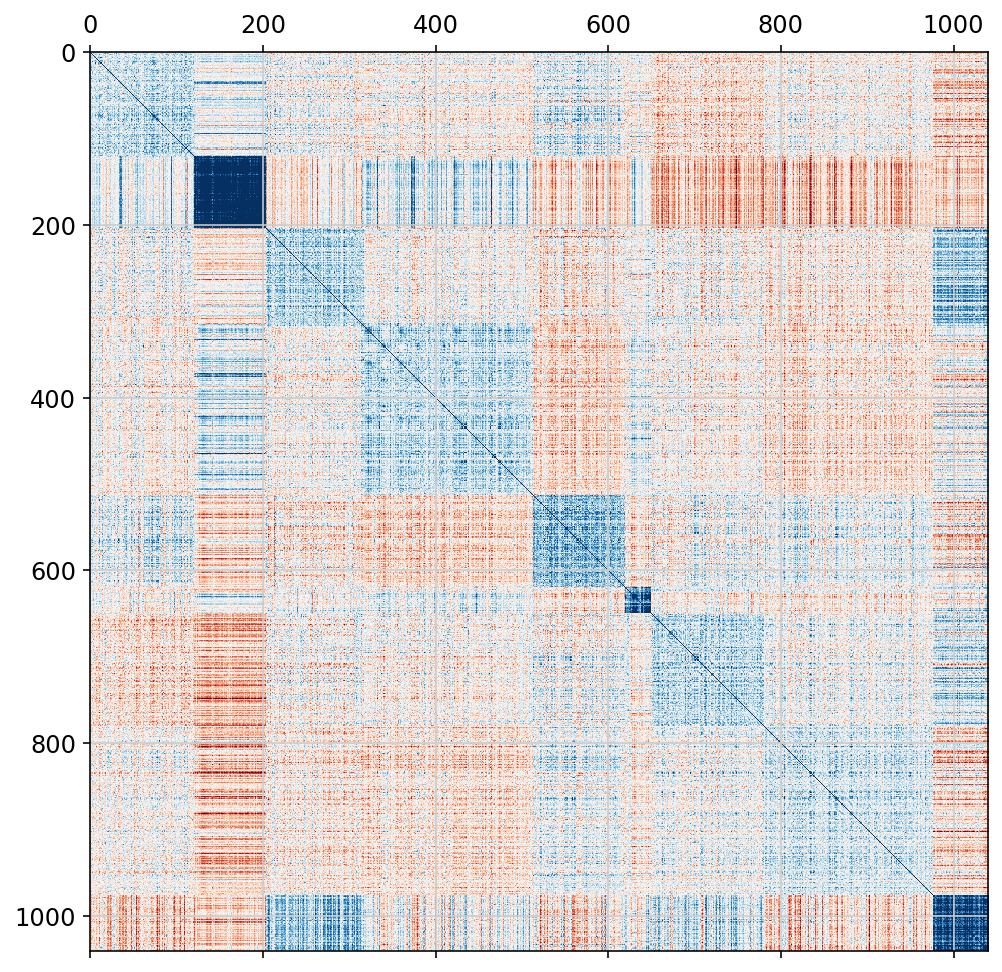

In [66]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
cax = ax.matshow(geneCov, cmap=plt.cm.RdBu, vmin=-0.5, vmax=0.5)

In [67]:
geneModules.to_csv("/home/beraslan/jovian-work/analysisSingle/ME_GeneModules_kmeans_"+str(n_GeneClusters)+"_Modules.csv")


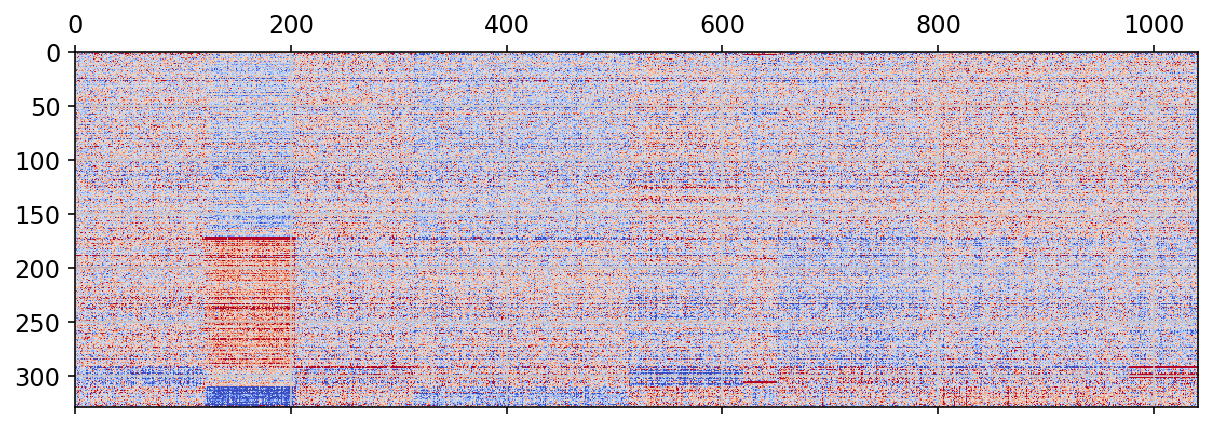

In [68]:
fig, ax = plt.subplots(figsize=(10,30))
ax.matshow(coefsAll.loc[guideCov.index, geneCov.index], cmap=plt.cm.coolwarm, vmin=-0.2, vmax=0.2)
